# <span>Life Expectancy Data Analysis</span>
## DMS - Regression Assignment (v1.2)
Author: <span>Lars Hartendorp</span><br>
Student number: <span>690720</span><br>
Date: <span>08-03-2024</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*):
* numpy
* pandas
* matplotlib
* seaborn

From these we will need the following libraries:

In [1]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')

try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')  

try:
    import matplotlib.pyplot as plt
    print('matplotlib already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('matplotlib was not installed, installed and imported')

try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported')

NumPy already installed, only imported
pandas already installed, only imported
matplotlib already installed, only imported
seaborn already installed, only imported


# 1. The Data
We are going to use the datafile 'Life Expectancy Data.csv'. This contains data from 'The WHO (World Health Organization)' and is found on Kaggle: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who.

In [2]:
#enter the code to load the data
life_expectancy_df=pd.read_csv('Life Expectancy Data.csv')

Here's a quick look at the data:

In [3]:
#enter the code to see the first few rows of the data
life_expectancy_df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


I want to predict the 'Life Expectancy'. Let's create a heatmap to see if there are any strong correlations

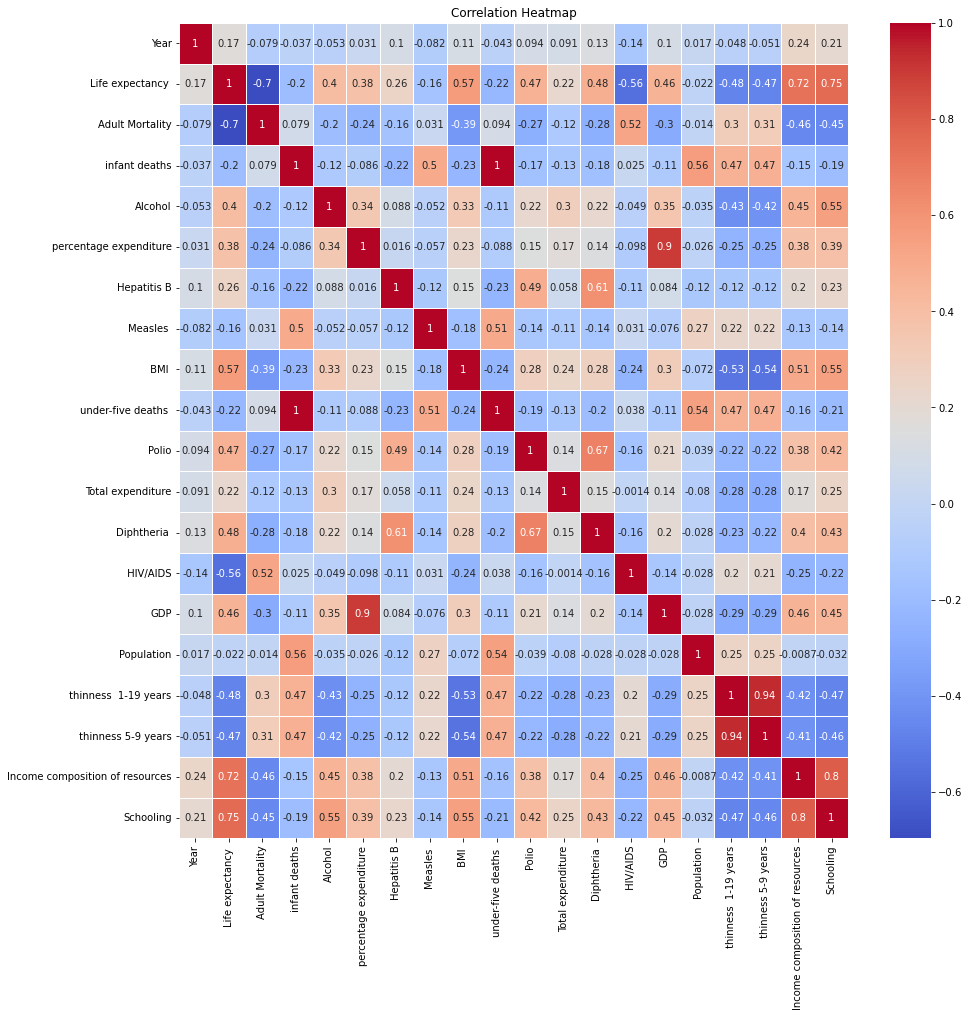

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(life_expectancy_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In the heatmap above you see 3 variables with a correlation of 0.5 or higher in the column of Life expectancy: - 'BMI (0.57)', - 'Income composition of resources (0.72)', - 'Schooling (0.75)'. I will use 'Income composition of resources' and 'Schooling' as my independent variables. <br><br> definition of the variables:<br> - 'Income composition of resources': Human Development Index in terms of income composition of resources (index ranging from 0 to 1)<br> - 'Schooling': Number of years of Schooling (years)<br> - 'Life expectancy': Life Expectancy in age (years) <br><br>
Is there a relation between the 'Life expectancy' (y value) and the 'Income composition of resources' (x value) and 'Schooling' (x value)?

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. We will start with 'Income composition of resources' as our x value.

We start with predicting <span>Life expectancy</span> using <span>'Income composition of resources'</span>. Below a visualisation of these two:

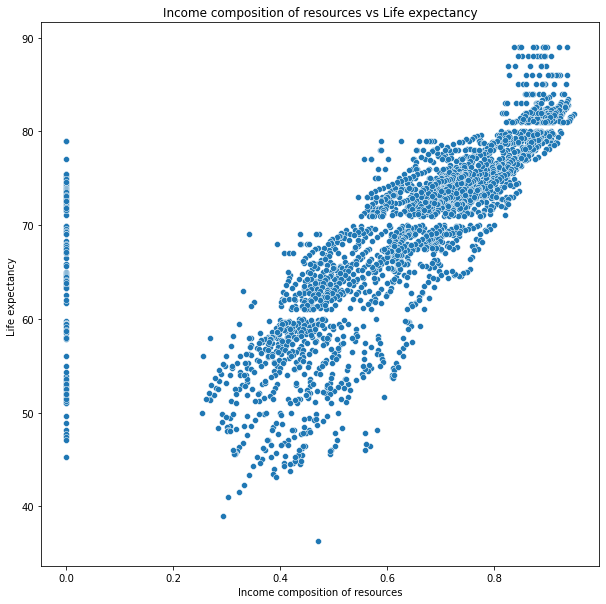

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Income composition of resources', y='Life expectancy ', data=life_expectancy_df)
plt.title('Income composition of resources vs Life expectancy')
plt.show()

As can be seen from the scatterplot there seems to be a<span> clear relationship between the two. If the 'Income composition of resources' is raises, the 'Life expectancy' raises as well</span>

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of 'Income composition of resources' and the y of 'Life expectancy'. We will use 60% of the data for training and 40% for testing.

Before we split, let's check the data types

In [6]:
print(life_expectancy_df['Life expectancy '].dtype)
print(life_expectancy_df['Income composition of resources'].dtype)

float64
float64


let's check if there are any missing values.

In [7]:
print(life_expectancy_df['Life expectancy '].isnull().sum())
print(life_expectancy_df['Income composition of resources'].isnull().sum())

10
167


We will drop these values

In [8]:
life_expectancy_df.dropna(subset=['Life expectancy ', 'Income composition of resources'], inplace=True)

Now we will split the data into training and testing data

In [9]:
from sklearn.model_selection import train_test_split
X = life_expectancy_df['Income composition of resources'].values.reshape(-1,1)
y = life_expectancy_df['Life expectancy '].values.reshape(-1,1)

X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X, y, test_size=0.4, random_state=0)


Now setup the linear regression model and fit our training data:

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_v1, y_train_v1)


Lets see how well the model performed with the training data, by visualisation:

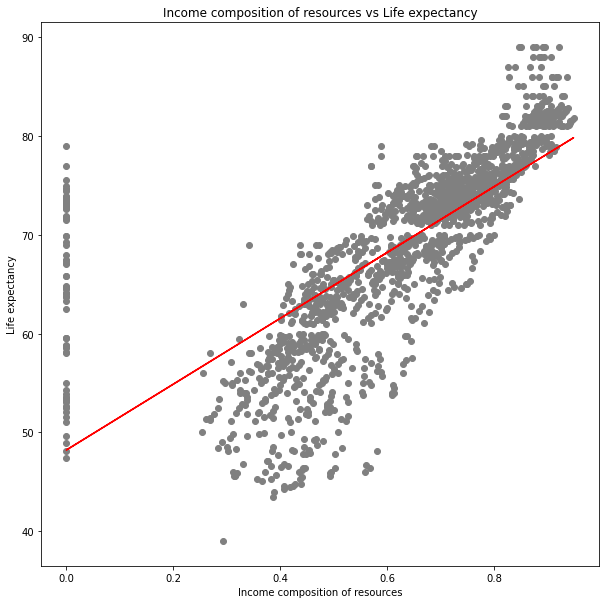

In [11]:
y_pred = model.predict(X_train_v1)

#add code to visualize the model
plt.figure(figsize=(10,10))
plt.scatter(X_train_v1, y_train_v1, color='gray')
plt.plot(X_train_v1, y_pred, color='red')
plt.title('Income composition of resources vs Life expectancy')
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy')
plt.show()


 the line in the figure describes the data well. It appears to be a positive correlation, which means that as the income composition of resources increases, life expectancy also increases.

In [12]:
#code to show the results of the statsmodels.api summary
import statsmodels.api as sm
x = sm.add_constant(X_train_v1)
y = y_train_v1

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1892.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          2.17e-276
Time:                        10:50:18   Log-Likelihood:                -5456.5
No. Observations:                1660   AIC:                         1.092e+04
Df Residuals:                    1658   BIC:                         1.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2124      0.506     95.321      0.0

explanation of R-squared: this is a score that tells you how well a straight line you draw on that graph fits the actual data points between 0 and 1. 'y' can be explained by 'x' according to this model. 
in our case(0.533), this means that the line captures some of the trend in the data and that there is a connection between income level and life expectancy. It is important to understand that one variable doesn't necessarily causes the other, it just tells there is a relationship between these two. <br><br> coef (coefficitent) explanation: 
<br>const: this is the base amount that always exists. Even if there is zero income (x1), the const value is 48.2124, or 48.2 years
<br>x1: independent variable (income). this affects the life expectancy. for every unit increasing, the model predicts to go up by 33.3 years

We can also check how well our model worked by using the testing data:

In [13]:
#code to show how well the model performmed using the test data 
from sklearn.metrics import mean_squared_error
x_test_v1_with_constant = sm.add_constant(X_test_v1)  
y_pred = model.predict(x_test_v1_with_constant)
print('Mean Squared Error:', mean_squared_error(y_test_v1, y_pred))



Mean Squared Error: 41.32188353367359


Mean squared error is a way to measure how far off the predictions of a model are from the actual values. The lower the MSE, the better the model performed.

Now we repeat all these steps, but using the other x-variable: 'Schooling' as our x value.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict <span>Life expectancy</span> using <span>'Schooling'</span> as our x value.

Below a visualisation of these two:

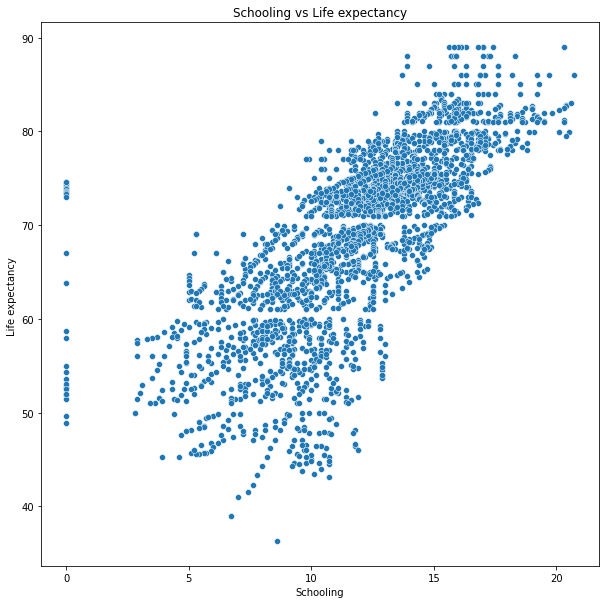

In [14]:
#enter code to show scatterplot between 'Schooling' and 'Life expectancy '
plt.figure(figsize=(10,10))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=life_expectancy_df)
plt.title('Schooling vs Life expectancy')
plt.show()

In [15]:
# check for missing values in the columns Schooling and Life expectancy
print(life_expectancy_df['Schooling'].isnull().sum())
print(life_expectancy_df['Life expectancy '].isnull().sum())

0
0


As can be seen from the scatterplot there seems to be a clear relationship between the two. If the 'Schooling' raises, the 'Life expectancy' raises as well

Creating again the training/testing sets and the model itself:

In [16]:
#add code here to split the data and the model itself:
X = life_expectancy_df['Schooling'].values.reshape(-1,1)
y = life_expectancy_df['Life expectancy '].values.reshape(-1,1)

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X, y, test_size=0.4, random_state=0)

model = LinearRegression().fit(X_train_v2, y_train_v2)

Now lets see how this performs:

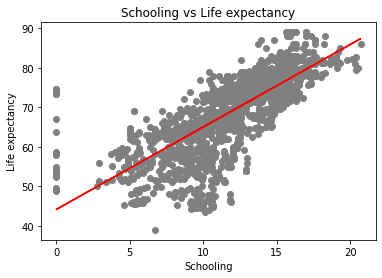

<Figure size 720x720 with 0 Axes>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     2056.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          1.27e-292
Time:                        10:50:18   Log-Likelihood:                -5419.1
No. Observations:                1660   AIC:                         1.084e+04
Df Residuals:                    1658   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.1612      0.572     77.267      0.0

In [17]:
#add code to show both the scatterplot with the regression line, and the model summary results.
plt.ylabel('Life expectancy')
plt.xlabel('Schooling')
plt.title('Schooling vs Life expectancy')
plt.scatter(X_train_v2, y_train_v2, color='gray')
plt.plot(X_train_v2, model.predict(X_train_v2), color='red')
plt.figure(figsize=(10,10))
plt.show()

x = sm.add_constant(X_train_v2)
y = y_train_v2

model = sm.OLS(y, x).fit()
print(model.summary())

#code to show how well the model performmed using the test data 
from sklearn.metrics import mean_squared_error
x_test_v2_with_constant = sm.add_constant(X_test_v2)  
y_pred = model.predict(x_test_v2_with_constant)
print('Mean Squared Error:', mean_squared_error(y_test_v2, y_pred))

the line in the figure describes the data well. It appears to be a positive correlation, which means that as the schooling increases, life expectancy also increases.

explanation of R-squared: this is a score that tells you how well a straight line you draw on that graph fits the actual data points between 0 and 1. 'y' can be explained by 'x' according to this model. 
in our case(0.554), this means that the line captures some of the trend in the data and that there is a connection between income level and life expectancy. It is important to understand that one variable doesn't necessarily causes the other, it just tells there is a relationship between these two. <br><br> coef (coefficitent) explanation: 
<br>const: this is the base amount that always exists. Even if there is zero schooling (x1), the const value is 44.1612, or 44.2 years
<br>x1: independent variable (schooling). this affects the life expectancy. for every unit increasing, the model predicts to go up by 2 years

Comparing the results of the two bivariate regressions, we can see that the R-squared value of the second regression is higher than the first one. This means that the second model is better at explaining the variance in the data than the first model. 

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict 'life expectancy' based on 'income' and 'schooling' separately. In this chapter we are going to look if we can make an even better prediction if we try to predict 'life expectancy' based on BOTH of these together.

We begin with combining the two x's into one X:

In [18]:
#add code here to add the two x's into one
combined_x = life_expectancy_df[['Schooling', 'Income composition of resources']]
combined_x

,Schooling,Income composition of resources
0,10.1,0.479
1,10.0,0.476
2,9.9,0.470
3,9.8,0.463
4,9.5,0.454
...,...,...
2933,9.2,0.407
2934,9.5,0.418
2935,10.0,0.427
2936,9.8,0.427


To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [19]:
#code to split the data, and create & fit the model:
X = combined_x
y = life_expectancy_df['Life expectancy ']

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X, y, test_size=0.4, random_state=0)

model = LinearRegression().fit(X_train_v3, y_train_v3)


A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

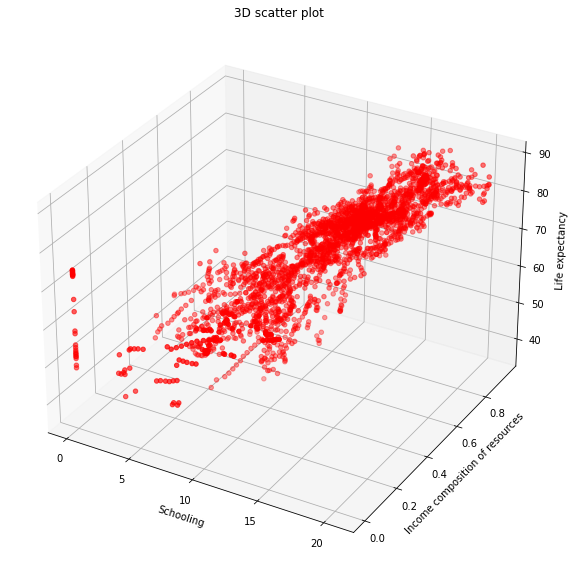

In [20]:
# 3d scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_x['Schooling'], combined_x['Income composition of resources'], life_expectancy_df['Life expectancy '], c='r', marker='o')

ax.set_xlabel('Schooling')
ax.set_ylabel('Income composition of resources')
ax.set_zlabel('Life expectancy')
plt.title('3D scatter plot')
plt.show()

In [21]:
#code to show model summary and how well the model performmed

x = sm.add_constant(X_train_v3)
y = y_train_v3

model = sm.OLS(y, x).fit()
print(model.summary())

#code to show how well the model performmed using the test data 
from sklearn.metrics import mean_squared_error
x_test_v3_with_constant = sm.add_constant(X_test_v3)  
y_pred = model.predict(x_test_v3_with_constant)
print('Mean Squared Error:', mean_squared_error(y_test_v3, y_pred))

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1243.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:50:18   Log-Likelihood:                -5327.8
No. Observations:                1660   AIC:                         1.066e+04
Df Residuals:                    1657   BIC:                         1.068e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Instead of looking at the R-square, we should be looking at the adjusted R-square, because Adjusted R-squared takes into account the number of variables in your model. 
When you combine two or more variables (income and schooling) into one variable (X), you're adding complexity to your model.
Regular R-squared might be fooled by this added complexity and show an inflated value.
Adjusted R-squared gives you a more reliable picture of how well your model with the combined variable actually fits the data.

We also see more rows now in the 'coef' column because we have increased the number of independent variables.

we can see that the R-squared value of the multivariate regression is higher than the R-squared values of the bivariate regressions. This means that the multivariate model is better at explaining the variance in the data than the bivariate models.

A last thing to do would be to check the VIF's:

In [22]:
#add code here to see the VIF's
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]



[13.57242794326831, 2.9378312523112875, 2.9378312523112884]

13.7 is the constant.
both the VIF's are below 10, which is good. This means that there is no multicollinearity between the two independent variables.

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict life expectancy by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

For this chapter, a different dataset is used. The dataset is called winequality-red.csv and is found on Kaggle.
The y value is the quality of the wine, and the x values are all the other variables.

In [23]:
import pandas as pd

X=pd.read_csv('winequality-red.csv')
y=pd.read_csv('winequality-red.csv')

#add code to create an X variable using all variables, except of course your y variable:
X=X[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y=y['quality']

# show all the columns in the dataframe
X.columns
print(y)

# print x and y shape
print(X.shape)
print(y.shape)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
(1599, 11)
(1599,)


We could first have a quick look at the results of this model:

In [24]:
# check the data types of the columns
X.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [25]:
# check for missing values in the columns
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [26]:
print(X.shape)
print(y.shape)


(1599, 11)
(1599,)


In [27]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# create and fit the model
model = LinearRegression().fit(x_train, y_train)

# show model summary
x = sm.add_constant(x_train)
y = y_train

model = sm.OLS(y, x).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     55.13
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           5.31e-94
Time:                        10:50:19   Log-Likelihood:                -942.98
No. Observations:                 959   AIC:                             1910.
Df Residuals:                     947   BIC:                             1968.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.5342 

However we have to be careful with those VIF's. So lets see:

In [28]:
#add code here to show the VIF's.
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


[1647101.4371247215,
 7.3975005723615945,
 1.7941319561835454,
 3.2160193329791777,
 1.853046220917082,
 1.5540087279460257,
 1.990072481853461,
 2.169200248388801,
 6.137428424832103,
 3.319375953829599,
 1.4919524400949573,
 2.939541294157156]

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

Note that in the outcome there a NO VIF scores above 10. However, I still wanted to show the function.

In [29]:
# Function to remove high VIF features
def remove_high_vif_features(data, threshold=10):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    while vif_data['VIF'].max() > threshold:
        max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        data = data.drop(max_vif_variable, axis=1)
        vif_data = pd.DataFrame()
        vif_data["Variable"] = data.columns
        vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return data


Lets run the function, and then use the result to create a new model:

In [30]:
# Call the function to remove predictors with VIF > 10
x_train_filtered = remove_high_vif_features(sm.add_constant(x_train), threshold=10)

# Show VIFs after removing high VIF features
vifs_after_removal = [variance_inflation_factor(x_train_filtered.values, i) for i in range(x_train_filtered.shape[1])]
print("\nVIFs after removing high VIF features:")
print(vifs_after_removal)

# Print X shape after removing high VIF features
print("\nX shape after removing high VIF features:")
print("x_train_filtered shape:", x_train_filtered.shape)


VIFs after removing high VIF features:
[4.811951354331621, 2.943528283949753, 4.109405090707289, 4.3083999315279256, 5.684039900085202, 5.435553470028335]

X shape after removing high VIF features:
x_train_filtered shape: (959, 6)


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [31]:
from itertools import combinations

# Function to find the best subset of features based on adjusted R-squared
def find_best_subset(data, target, threshold=10):
    best_subset = None
    best_adj_r2 = 0

    for r in range(1, len(data.columns) + 1):
        for subset in combinations(data.columns, r):
            subset_data = data[list(subset)]
            subset_data_with_constant = sm.add_constant(subset_data)
            model = sm.OLS(target, subset_data_with_constant).fit()
            adj_r2 = model.rsquared_adj

            if adj_r2 > best_adj_r2:
                best_adj_r2 = adj_r2
                best_subset = subset_data.columns.tolist()

    return best_subset


Finally lets see how this new model performs:

In [32]:
# Find the best subset of features based on adjusted R-squared
best_subset = find_best_subset(x_train_filtered, y_train)

# Display the best subset
print("\nBest subset of features based on adjusted R-squared:")
print(best_subset)

# Train the model with the best subset
best_subset_with_constant = sm.add_constant(x_train_filtered[best_subset])
best_model = sm.OLS(y_train, best_subset_with_constant).fit()

# Show model summary for the best model
print("\nModel summary for the best subset:")
print(best_model.summary())



Best subset of features based on adjusted R-squared:
['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide']

Model summary for the best subset:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     57.38
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           3.03e-52
Time:                        10:50:19   Log-Likelihood:                -1054.1
No. Observations:                 959   AIC:                             2120.
Df Residuals:                     953   BIC:                             2149.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           co

The R-suared and adjusted R-squared are different from the previous models, because this is a different dataset. The reason for this is that I got errors when trying to read, run and predict the data from the 'Life expectancy.csv'. I tried to fix it, but I couldn't. I am sorry for this.

From this dataset, I can see a low R-squared and adjusted R-squared. This means that the model is not good at explaining the variance in the data.

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [33]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the Random Forest (RF) is explained.

For this technique, the dataset from chapter 4 is used. The dataset is called winequality-red.csv and is found on Kaggle.

Random Forest is like a group decision-making process in machine learning. Instead of relying on one model, it creates a bunch of decision trees (like asking many people for directions). Each tree explores the data slightly differently, then they all vote on the best answer. This makes it robust and flexible, able to handle many features and complex data, but it can be harder to understand exactly why it makes a particular prediction.

Key differences between Random Forest and Linear Regression:
RF can capture nonlinear relationships, unlike LR.
RF provides insights into feature importance by measuring how much a feature contributes to the split decision across all trees.
RF can handle both categorical and numeric values natively, while LR can only handle numeric values.

Optimal situations for Random Forest:
When you have a large dataset with many features, and you want to capture complex relationships between features and the target variable.
When you want to understand feature importance and how much each feature contributes to the model's predictions.
When you want to handle both categorical and numeric values natively.
When missing data is present, as Random Forest can handle missing values due to tree construction.


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
# read the data
random_forest_df=pd.read_csv('winequality-red.csv')
random_forest_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
# check for missing values
random_forest_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Let's seperate the data into the independent (X) and dependent (y) variables. 

In [37]:
X=random_forest_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y=random_forest_df['pH']

Splitting the data into a training and testing set. We will use 60% of the data for training and 40% for testing.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
h=RandomForestRegressor(n_estimators=100, random_state=0)

Fitting the model to the training data

In [39]:
h.fit(x_train, y_train)
y_pred = h.predict(x_test)
mean_squared_error(y_test, y_pred)

0.0055358036093750024

Next up, we are going to determine variable importance, just for insights and determination of what the strongest variables are for regression. 

In [40]:
importance = h.feature_importances_
variable_importance = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
variable_importance = variable_importance.sort_values(by='Importance', ascending=False)
print(variable_importance)


               Variable  Importance
0         fixed acidity    0.549367
7               density    0.077711
8             sulphates    0.072141
6  total sulfur dioxide    0.058470
4             chlorides    0.054243
1      volatile acidity    0.045315
9               alcohol    0.043336
2           citric acid    0.040253
5   free sulfur dioxide    0.030851
3        residual sugar    0.028313


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----